In [1]:
import sys
sys.path.append('../../MembraneQuant')
from membranequant import *
import seaborn as sns
%matplotlib notebook

In [2]:
df = pd.read_csv('df.csv')
df['Label'] = df.apply(lambda x: {'kk1273': 'Wild type', 'lp637': 'Wild type (Neon)', 'nwg214(unbalanced)': 'C56S', 
                                  'nwg269': 'K351A', 'nwg274': 'K94A', 'n2': 'N2'}[x.Condition], axis=1)

In [3]:
df_no_n2 = df[df.Condition != 'n2']

<IPython.core.display.Javascript object>


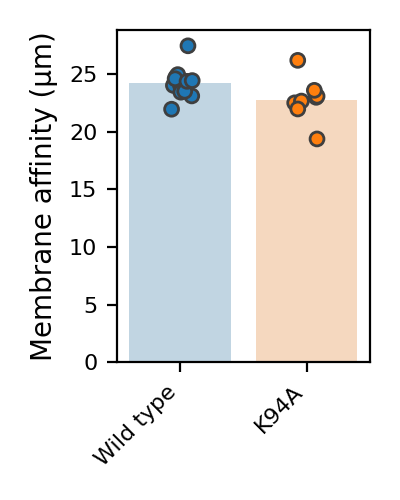

In [4]:
fig, ax = plt.subplots()
order = ['Wild type', 'K94A']
sns.stripplot(data=df_no_n2, x='Label', y='Ratio post', ax=ax, order=order, linewidth=1)
sns.barplot(data=df, x='Label', y ='Ratio post', order=order, alpha=0.3, errwidth=0)
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_horizontalalignment('right')
ax.set_xlabel('')
ax.set_ylabel('Membrane affinity (μm)')
ax.tick_params(axis='both', labelsize=8)
fig.set_size_inches(2, 2.5)
fig.tight_layout()
fig.savefig('Figs/affinity.png', dpi=600, transparent=True)

In [5]:
# fig, ax = plt.subplots()
# order = ['Wild type', 'K94A']
# sns.stripplot(data=df_no_n2, x='Label', y='Dosage', ax=ax, order=order, linewidth=1)
# sns.barplot(data=df, x='Label', y ='Dosage', order=order, alpha=0.3, errwidth=0)
# for tick in ax.get_xticklabels():
#     tick.set_rotation(45)
#     tick.set_horizontalalignment('right')
# ax.set_xlabel('')
# ax.set_ylabel('Dosage (a.u.)')
# ax.tick_params(axis='both', labelsize=8)
# fig.set_size_inches(2, 3)
# fig.tight_layout()
# fig.savefig('Figs/dosage.png', dpi=600, transparent=True)

<IPython.core.display.Javascript object>


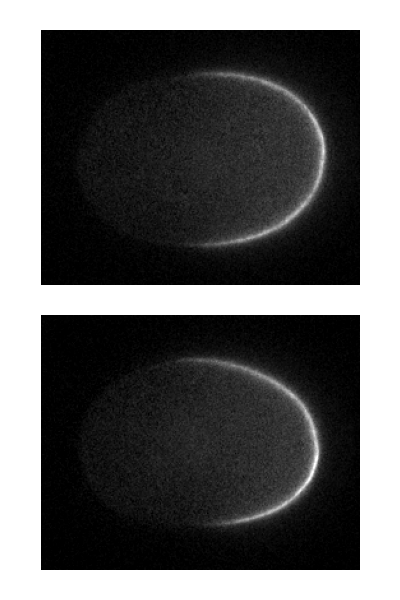

In [6]:
def func(path, ax):
    img = load_image(path + '/af_corrected.tif')
    roi = np.loadtxt(path + '/ROI.txt')
    rotated = rotated_embryo(img, roi, 250, 200, 3)
    ax.imshow(rotated, cmap='gray', vmin=0, vmax=25000)
    ax.axis('off')

fig, ax = plt.subplots(2, 1)
func(df[df.Label == 'Wild type'].Path.iloc[0], ax[0])
func(df[df.Label == 'K94A'].Path.iloc[0], ax[1])
fig.set_size_inches(2, 3)
fig.tight_layout()
fig.savefig('Figs/imgs.png', dpi=600, transparent=True)

In [7]:
# def func(path, ax, title):
#     img = load_image(path + '/af_corrected.tif')
#     roi = np.loadtxt(path + '/ROI.txt')
#     rotated = rotated_embryo(img, roi, 250, 200, 3)
#     ax.imshow(rotated, cmap='gray', vmin=0, vmax=25000)
#     ax.axis('off')
#     ax.set_title(title, fontsize=10)

# fig, ax = plt.subplots(1, 3)
# func(df[df.Label == 'Wild type'].Path.iloc[0], ax[0], 'Wild type')
# func(df[df.Label == 'K94A'].Path.iloc[0], ax[1], 'K94A')
# func(df[df.Label == 'C56S'].Path.iloc[0], ax[2], 'C56S')
# fig.set_size_inches(6, 1.7)
# fig.tight_layout()
# # fig.savefig('Figs/imgs.png', dpi=600, transparent=True)